In [2]:
import pd3
study = pd3.Study()
study.load_file("/home/reap2020/notebooks/spaghetti.pb")

True

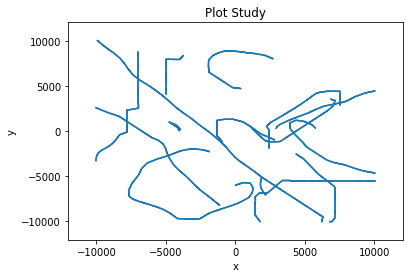

In [23]:
import importlib
import pd3_plot_colors
importlib.reload(pd3_plot_colors)
from pd3_plot_colors import normalize, plot_study, plot_study3D

x = normalize(1,0,0)
y = normalize(0,1,0)
    
plot_study(study) # Markus's code

# Download paraview if you want (just to see hwat they do)
# Find a way to reuse DFS (probably mamek a new function that returns lines)
# Color by slip system